In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
path = 'polblogs.gml'
g_data = nx.read_gml(path)
g_rand = nx.gnm_random_graph(g_data.number_of_nodes(), g_data.number_of_edges())

top_n = 100

#Counts the nuumber of links attached to a given node.
deg_cent_g_data = sorted(dict(nx.degree_centrality(nx.DiGraph(g_data))).items(), key=lambda x:x[1])[-top_n:]

#Eigenvector of the largest eigenvalue when computed from the adj. matrix of the network.
eig_cent_g_data = sorted(dict(nx.eigenvector_centrality_numpy(nx.DiGraph(g_data))).items(), key=lambda x:x[1])[-top_n:]

#Prob for a node to be on the shortest path between two other nodes.
betw_cent_g_data = sorted(dict(nx.betweenness_centrality(nx.DiGraph(g_data))).items(), key=lambda x:x[1])[-top_n:]

#Inverse of an average distance from a node to all other nodes.
close_cent_g_data = sorted(dict(nx.closeness_centrality(nx.DiGraph(g_data))).items(), key=lambda x:x[1])[-top_n:]

size_larg_conn_comp = max(nx.connected_components(nx.DiGraph.to_undirected(g_data)), key=len)

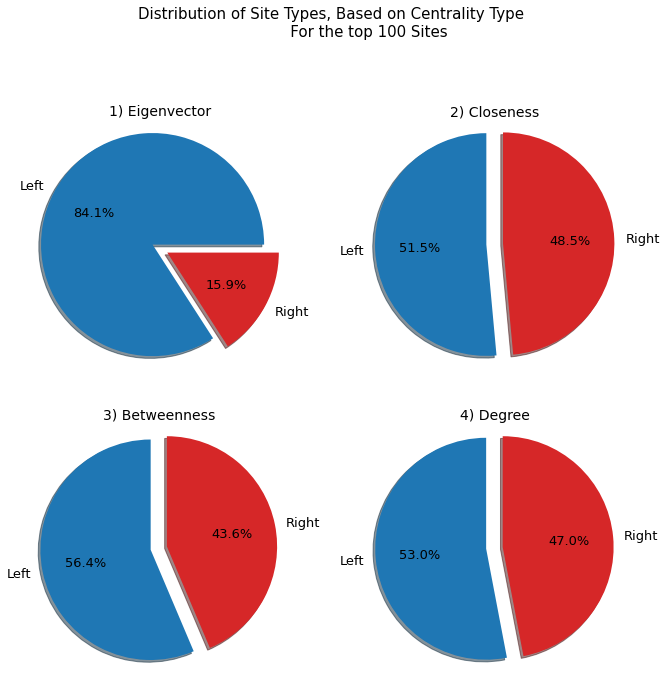

In [18]:
def sites_scores_to_dict(data=None, G=None):
    data_list = [each[0] for each in data]
    results = []
    for key, value in dict(G.nodes).items():
        results_dict = {}
        if key in data_list:
            results_dict['site'] = key
            results_dict['type'] = value['value']
            results.append(results_dict)
    return results

def sites_to_dict(data=None):
    results = []
    for each in data:
        results_dict = {}
        results_dict['site'] = each[0]
        results_dict['score'] = each[1]
        results.append(results_dict)
    return results

def flat(list1=None, list2=None):
    results_dict = defaultdict(dict)
    for each_i in (list1, list2):
        for each_e in each_i:
            results_dict[each_e['site']].update(each_e)
    return results_dict.values()

#D
list1_d = sites_scores_to_dict(data=deg_cent_g_data, G=g_data)
list2_d = sites_to_dict(data=deg_cent_g_data)
d_cent = flat(list1=list1_d, list2=list2_d)
type_list_d_cent = [i['type'] for i in d_cent]
val_d = [type_list_d_cent.count(0), type_list_d_cent.count(1)]
labels_d = ['Left', 'Right']

#B
list1_b = sites_scores_to_dict(data=betw_cent_g_data, G=g_data)
list2_b = sites_to_dict(data=betw_cent_g_data)
b_cent = flat(list1=list1_b, list2=list2_b)
type_list_b_cent = [i['type'] for i in b_cent]
val_b = [type_list_d_cent.count(0), type_list_b_cent.count(1)]
labels_b = ['Left', 'Right']

#C
list1_c = sites_scores_to_dict(data=close_cent_g_data, G=g_data)
list2_c = sites_to_dict(data=close_cent_g_data)
c_cent = flat(list1=list1_c, list2=list2_c)
type_list_c_cent = [i['type'] for i in c_cent]
val_c = [type_list_d_cent.count(0), type_list_c_cent.count(1)]
labels_c = ['Left', 'Right']

#E
list1_e = sites_scores_to_dict(data=eig_cent_g_data, G=g_data)
list2_e = sites_to_dict(data=eig_cent_g_data)
e_cent = flat(list1=list1_e, list2=list2_e)
type_list_e_cent = [i['type'] for i in e_cent]
val_e = [type_list_d_cent.count(0), type_list_e_cent.count(1)]
labels_e = ['Left', 'Right']

explode = (0.15, 0)
plt.figure(figsize=(10, 10))
plt.suptitle('Distribution of Site Types, Based on Centrality Type \n \
              For the top 100 Sites', fontsize=15)

plt.subplot(2, 2, 1)
plt.title('1) Eigenvector', fontsize=14)
plt.pie(val_e, labels=labels_e, autopct='%1.1f%%', explode=explode, 
        textprops={'fontsize': 13}, shadow=True, 
        colors=['tab:blue', 'tab:red'])
plt.tight_layout(pad=4.0)
plt.axis('equal')

plt.subplot(2, 2, 2)
plt.title('2) Closeness', fontsize=14)
plt.pie(val_c, labels=labels_c, autopct='%1.1f%%', explode=explode, 
        startangle=90, textprops={'fontsize': 13}, shadow=True,
        colors=['tab:blue', 'tab:red'])
plt.tight_layout(pad=4.0)
plt.axis('equal')

plt.subplot(2, 2, 3)
plt.title('3) Betweenness', fontsize=14)
plt.pie(val_b, labels=labels_b, autopct='%1.1f%%', explode=explode, 
        startangle=90, textprops={'fontsize': 13}, shadow=True,
        colors=['tab:blue', 'tab:red'])
plt.tight_layout(pad=4.0)
plt.axis('equal')

plt.subplot(2, 2, 4)
plt.title('4) Degree', fontsize=14)
plt.pie(val_d, labels=labels_d, autopct='%1.1f%%', explode=explode, 
        startangle=90, textprops={'fontsize': 13}, shadow=True, 
        colors=['tab:blue', 'tab:red'])
plt.tight_layout(pad=4.0)
plt.axis('equal')

plt.show()